## Two-dimensional array and gradient problem

### Problem 1: Linear function

In [760]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

x_values: ndarray = np.arange(-50, 50.1, 0.1)
y_values: ndarray = (x_values/2) + 1

# print(x_values)
print(f"First 10: {y_values[0:10]}")
print(f"Last 10: {y_values[-10:-1]}")

First 10: [-24.   -23.95 -23.9  -23.85 -23.8  -23.75 -23.7  -23.65 -23.6  -23.55]
Last 10: [25.55 25.6  25.65 25.7  25.75 25.8  25.85 25.9  25.95]


#### Problem 2: Array combination

In [761]:
combined_array: ndarray = np.column_stack((x_values, y_values))
combined_array = combined_array.reshape(1001, 2)

### Problem 3: Find the gradient

In [762]:
x_amount_of_change = x_values[1:] - x_values[:-1]
y_amount_of_change = y_values[1:] - y_values[:-1]

gradient = y_amount_of_change / x_amount_of_change


### Problem 4: Draw a graph

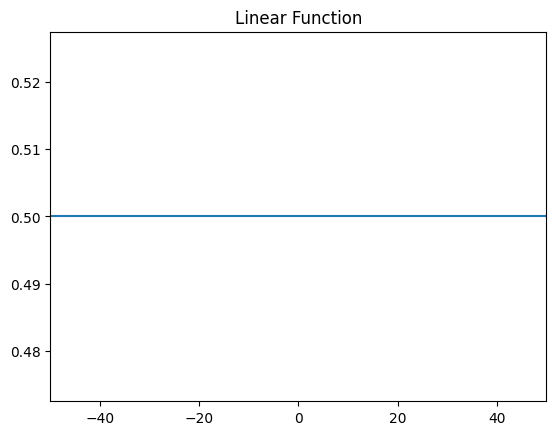

In [763]:
plt.title("Linear Function")
plt.plot(x_values[:-1], gradient)
plt.xlim(-50, 50)
plt.show()

###  Problem 5: Python functionalization

####  Part 1: Creating the function

In [764]:
def compute_gradient(_function , _x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    _function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    _x_range : tuple
      Specify the range in the same way as the argument of np.arange().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on _x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    _x_values: ndarray = np.arange(start=_x_range[0], stop=_x_range[1], step=_x_range[2])
    _y_values: ndarray = _function(_x_values)
    
    _gradient: ndarray = _y_values[1:] - _y_values[:-1] / _x_values[1:] - _x_values[:-1] 
    
    _array_xy: ndarray = np.append([_x_values], [_y_values])
    
    _array_xy = np.column_stack((_x_values, _y_values)).reshape(len(_x_values), 2)
    _gradient = _gradient.reshape(len(_x_values)-1,)
    return _array_xy, _gradient

function1 = lambda _array_x: np.power(_array_x, 2)
function2 = lambda _array_x: 2 * np.power(_array_x, 2) + np.power(2, _array_x)
function3 = lambda _array_x: np.sin(np.power(_array_x, 1/2))



####  Part 2: Plotting the results

In [765]:
array_xy1, gradient1 = compute_gradient(function1)
array_xy2, gradient2 = compute_gradient(function2)
array_xy3, gradient3 = compute_gradient(function3, _x_range=(0, 50.1, 0.1))

def plot_gradient(_gradient: ndarray, _func_name: str):
    plt.title(f"{_func_name} Gradient")
    plt.plot(_gradient)
    plt.show()

##### Function 1 Graph

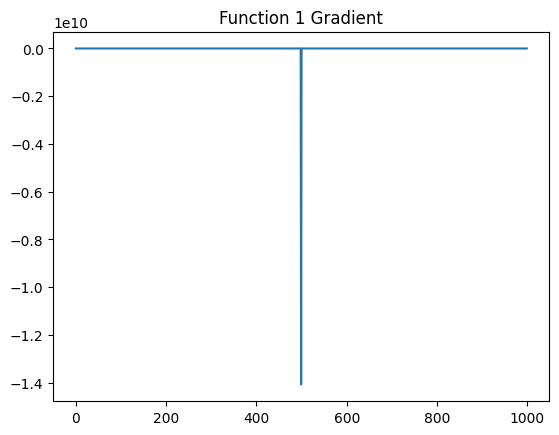

In [766]:
plot_gradient(gradient1, "Function 1")

##### Function 2 Graph

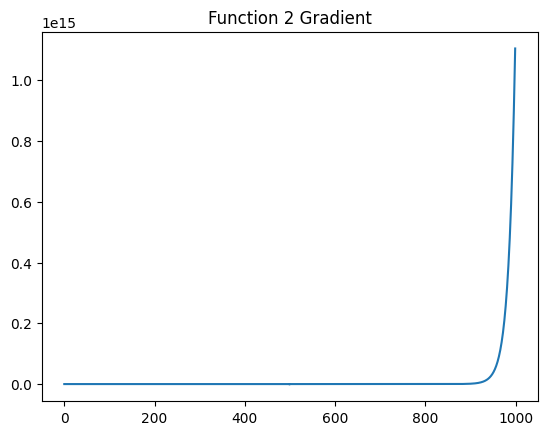

In [767]:
plot_gradient(gradient2, "Function 2")

##### Function 3 Graph

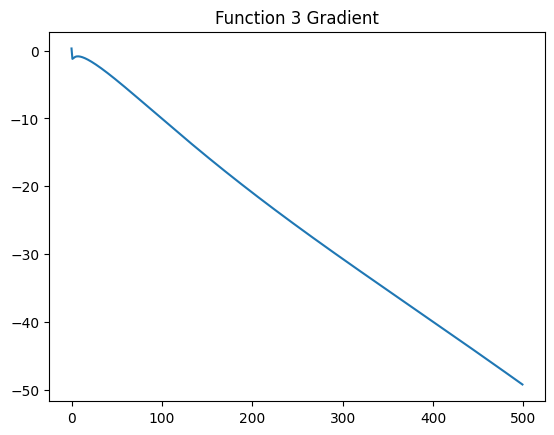

In [768]:
plot_gradient(gradient3, "Function 3")

### Problem 6: Find the minimum value

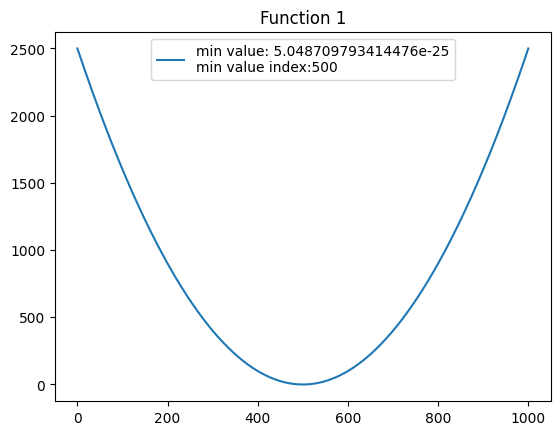

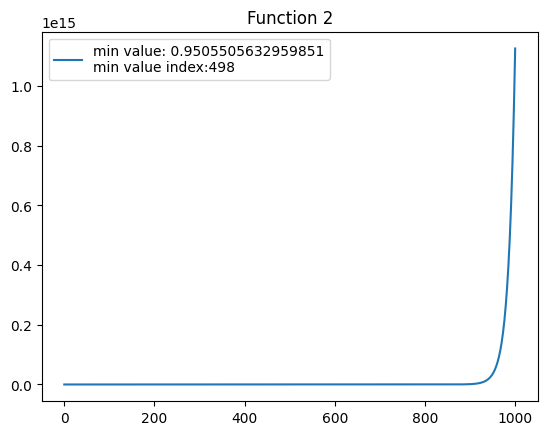

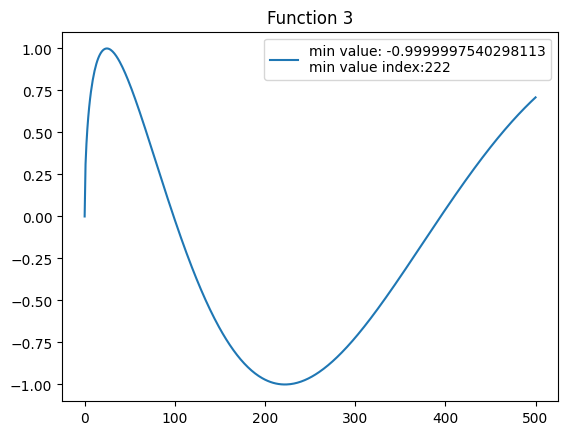

In [769]:
def plot_function(_array_xy: ndarray, _func_name: str):
    _min_value = np.min(_array_xy.transpose()[1])
    _min_value_index = np.argmin(_array_xy.transpose()[1])
    plt.title(_func_name)
    # plt.plot(_array_xy.transpose()[0], _array_xy.transpose()[1])
    plt.plot(_array_xy.transpose()[1])
    plt.legend([f"min value: {_min_value}"
             f"\nmin value index:{_min_value_index}"])
    plt.show()
    
plot_function(array_xy1, "Function 1")
plot_function(array_xy2, "Function 2")
plot_function(array_xy3, "Function 3")